<a href="https://colab.research.google.com/github/swaspicious/ML-Models/blob/main/Building_logistic_regression_model_from_scratch_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

**Logistic regression:**

In [ ]:
class logisticregression():

  # initiating the learning rate and no. of iterations (the hyperparameters)
  def __init__(self, learning_rate, no_of_iterations):

    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  # fit function is used to train the model with some dataset. it takes the input features (x) and target feature (y) as parameters.
  def fit(self, x, y):

    self.m, self.n = x.shape  # m -> no. of datapoints in dataset (no. of rows), n -> no. of input features (no. of columns).

    # initiating the weight and bias value (the model parameters)
    self.w = np.zeros(self.n)
    self.b = 0
    self.x = x
    self.y = y

    # implementing gradient descent for optimization:
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self):

    # Y-cap or Y-hat formula (sigmoid function):
    y_hat = 1 / (1 + np.exp(-(self.x.dot(self.w) + self.b)))  # finding the exponent value using the 'np.exp()' function. substituting z = 'w.x + b' inside exp.

    # derivatives:
    dw = (1/self.m)* np.dot(self.x.T, (y_hat - self.y))  # x.shape = 769 x 8, y.shape = 769 x 1. so in order to multiply (dot product) the matrices, we need to take x transpose. hence, (8 x 769) * (769 x 1) -> valid.
    db = (1//self.m)* np.sum(y_hat - self.y)

    # updating the weights and bias using gradient descent equation: this will calculate the optimum values of weights and bias over the iterations.
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  # sigmoid equation & decision boundary:
  def predict(self, x):

    y_pred = 1 / (1 + np.exp(-(x.dot(self.w) + self.b)))
    y_pred = np.where(y_pred > 0.5, 1, 0)  # just like an 'if' condition. so if y_pred > 0.5, y_pred = 1. else y_pred = 0.
    return y_pred




In [ ]:
# model = logisticregression() -> loading an instance of the class logisticregression.

#Workflow of the logistic regression model:

- Step 1: Set learning rate and number of iterations. Initiate random weight and bias value.
- Step 2: Build logistic regression function (sigmoid function).
- Step 3: Update the paramteres using gradient descent.

Finally we will get the best (most optimal) model with the best weight and bias value, indicating minimal cost function.

- Step 4: Build the 'predict function' to determine the class of the data point (like 0 or 1).

#Implementing the Logistic Regression model:

Importing the dependencies:

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Data collection and analysis:**

In [ ]:
diabetesdataset = pd.read_csv('/content/diabetes (1).csv')

In [ ]:
diabetesdataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetesdataset.shape

(768, 9)

In [ ]:
diabetesdataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
diabetesdataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 -> non-diabetic

1 -> diabetic

In [ ]:
diabetesdataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
features = diabetesdataset.drop(columns = 'Outcome', axis=1)
target = diabetesdataset['Outcome']

In [ ]:
print(features)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [ ]:
print(target)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Data standardization:**

-> Required here because the range of values differs significantly for the different input features, so we need to bring them in the same range.

In [ ]:
scaler = StandardScaler()

In [ ]:
# to standardize the features columns, i.e the input features values
scaler.fit(features)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(features)

In [ ]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
features = standardized_data
target = diabetesdataset['Outcome']

**Train Test split:**

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=2)

In [ ]:
print(features.shape,xtrain.shape, xtest.shape)

(768, 8) (614, 8) (154, 8)


**Training the model:**

In [ ]:
classifier = logisticregression(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
# training the logistic regression model:
classifier.fit(xtrain,ytrain)

**Model Evaluation:**

Accuracy score -

In [ ]:
# accuracy score on the training data:
xtrain_pred = classifier.predict(xtrain)
training_data_accuracy = accuracy_score(ytrain, xtrain_pred)

In [ ]:
print(' Accuracy score of the training data is :', training_data_accuracy)

 Accuracy score of the training data is : 0.741042345276873


In [ ]:
# accuracy score on the test data:
xtest_pred = classifier.predict(xtest)
test_data_accuracy = accuracy_score(ytest, xtest_pred)

In [ ]:
print(' Accuracy score of the testing data is :', test_data_accuracy)

 Accuracy score of the testing data is : 0.7207792207792207


so the accuracy score of the test data is close to that of the training data, which shows that out model didn't overfit.

**Making a predictive system:**

In [ ]:
inputdata = (3,78,50,32,88,31,0.248,26)

#changing the input data to numpy array:
ipdata = np.asarray(inputdata)

#reshape the array as we are predicting for one instance:
ipdata_reshaped = ipdata.reshape(1,-1)

# standardize the input data:
std_data = scaler.transform(ipdata_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

if(prediction[0]==0):
  print('The person is non-diabetic')
else:
  print('The person is diabetic')

[0]
The person is non-diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


*Why prediction[0] has been used?*

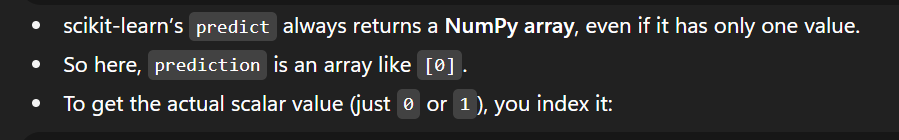

*What does reshape(1,-1) do?*

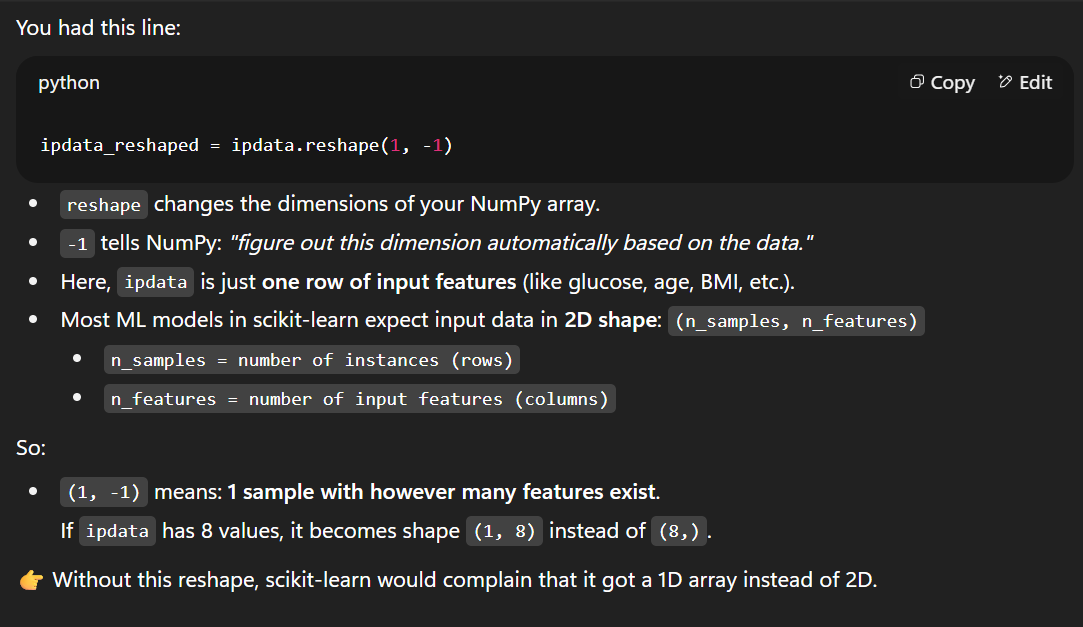